In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from cycler import cycler

In [4]:
from matplotlib.ticker import FuncFormatter

In [5]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [6]:
pd.set_option('display.max_colwidth', 400)
pd.set_option('display.max_rows',4000)

In [7]:
df = pd.read_csv('UNdata_tobacco.csv')
df.head()

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg)
0,Afghanistan,2016,Cigarettes containing tobacco,Import,49111872.0,2629072.0
1,Afghanistan,2016,Homogenized or reconstituted tobacco,Import,1177842.0,NaN
2,Afghanistan,2015,Cigarettes containing tobacco,Import,87227851.0,4347904.0
3,Afghanistan,2015,Homogenized or reconstituted tobacco,Import,427504.0,106520.0
4,Afghanistan,2014,Cigarettes containing tobacco,Import,3984800.0,207074.0


In [8]:
#THE ORIGINAL DATABASE DOES NOT PROVIDE WEIGHT VALUES FOR ALL TYPES OF COMMODITY EXPORTED. 
#THAT IS GOING TO AFFECT HOW FAR THE ANALYSIS CAN GO ON.
China = df[df['Country or Area'].str.contains("China, Hong Kong SAR", case=False, na=False)]
China.head()

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg)
9059,"China, Hong Kong SAR",2017,"Tobacco, unmanufactured, stemmed or stripped",Import,4.489263e+07,7013840.0
9060,"China, Hong Kong SAR",2017,"Tobacco, unmanufactured, stemmed or stripped",Export,8.884940e+03,1273.0
9061,"China, Hong Kong SAR",2017,"Tobacco, unmanufactured, stemmed or stripped",Re-Export,8.884940e+03,1273.0
9062,"China, Hong Kong SAR",2017,Tobacco refuse,Import,1.219581e+06,2451000.0
9063,"China, Hong Kong SAR",2017,"Cigars, cheroots and cigarillos, containing tobacco",Import,8.650442e+07,378477.0


In [9]:
df.columns = df.columns.str.replace('\s+', '_')

In [10]:
df.columns = df.columns.str.replace('(','_')

In [11]:
df.columns = df.columns.str.replace(')','_')

In [12]:
df.columns = df.columns.str.replace('Country_or_Area','Country_Area')
df.columns = df.columns.str.replace('Trade__USD_','USD')
df.columns = df.columns.str.replace('Weight__kg_','Weight')

In [13]:
df.head(1)

,Country_Area,Year,Commodity,Flow,USD,Weight
0,Afghanistan,2016,Cigarettes containing tobacco,Import,49111872.0,2629072.0


In [14]:
df.count()

Country_Area    48995
Year            48995
Commodity       48995
Flow            48995
USD             48995
Weight          48285
dtype: int64

In [15]:
df.Flow.value_counts()

Import       26829
Export       18849
Re-Export     2692
Re-Import      625
Name: Flow, dtype: int64

In [16]:
export_df = df[df.Flow.str.contains("Export", case=False, na=False)]
export_df.head()
#export_df.Flow.value_counts()

,Country_Area,Year,Commodity,Flow,USD,Weight
14,Albania,2016,"Tobacco, unmanufactured, not stemmed or stripped",Export,183785.0,103767.0
15,Albania,2016,"Tobacco, unmanufactured, stemmed or stripped",Export,4110889.0,1323120.0
18,Albania,2016,Cigarettes containing tobacco,Export,694779.0,162157.0
24,Albania,2013,"Tobacco, unmanufactured, stemmed or stripped",Export,4603628.0,1205741.0
27,Albania,2013,Cigarettes containing tobacco,Export,1495582.0,309236.0


In [17]:
import numpy as np

In [18]:
export_df['Flow2'] = np.where(export_df['Flow']=='Export','domestic','foreign')
export_df.head()
#export_df.Flow2.value_counts()

C:\Users\kellykiki\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Country_Area,Year,Commodity,Flow,USD,Weight,Flow2
14,Albania,2016,"Tobacco, unmanufactured, not stemmed or stripped",Export,183785.0,103767.0,domestic
15,Albania,2016,"Tobacco, unmanufactured, stemmed or stripped",Export,4110889.0,1323120.0,domestic
18,Albania,2016,Cigarettes containing tobacco,Export,694779.0,162157.0,domestic
24,Albania,2013,"Tobacco, unmanufactured, stemmed or stripped",Export,4603628.0,1205741.0,domestic
27,Albania,2013,Cigarettes containing tobacco,Export,1495582.0,309236.0,domestic


In [19]:
#pd.options.display.float_format = '{:.0f}'.format

In [20]:
export_df.Flow.replace("Re-Export", 'Export',inplace=True)
#export_df = export_df.drop(export_df[export_df.Flow == 'Re-Export'].index)
export_df.head()
#export_df.Flow2.value_counts()


C:\Users\kellykiki\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Country_Area,Year,Commodity,Flow,USD,Weight,Flow2
14,Albania,2016,"Tobacco, unmanufactured, not stemmed or stripped",Export,183785.0,103767.0,domestic
15,Albania,2016,"Tobacco, unmanufactured, stemmed or stripped",Export,4110889.0,1323120.0,domestic
18,Albania,2016,Cigarettes containing tobacco,Export,694779.0,162157.0,domestic
24,Albania,2013,"Tobacco, unmanufactured, stemmed or stripped",Export,4603628.0,1205741.0,domestic
27,Albania,2013,Cigarettes containing tobacco,Export,1495582.0,309236.0,domestic


In [21]:
export_df.Flow2.value_counts()

domestic    18849
foreign      2692
Name: Flow2, dtype: int64

In [22]:
export_df.Commodity.value_counts()

Cigarettes containing tobacco                            3839
Cigarette or pipe tobacco and tobacco substitute mixe    2774
Cigars, cheroots and cigarillos, containing tobacco      2688
Tobacco, unmanufactured, stemmed or stripped             2598
Tobacco, unmanufactured, not stemmed or stripped         2523
Products of tobacco, substitute nes, extract, essence    2106
Cigars, cheroots, cigarettes, with tobacco substitute    1996
Tobacco refuse                                           1921
Homogenized or reconstituted tobacco                     1096
Name: Commodity, dtype: int64

In [23]:
pd.options.display.float_format = '{:.2f}'.format

In [24]:
#"Export" refers to domestic goods exported and "Re-Export" refers to foreign goods exported
df_2017 = export_df[export_df['Year']==2017]
df_2017.head()

,Country_Area,Year,Commodity,Flow,USD,Weight,Flow2
198,Algeria,2017,Cigarettes containing tobacco,Export,11974.74,865.81,domestic
200,Algeria,2017,"Products of tobacco, substitute nes, extract, essence",Export,5808.69,410.00,domestic
821,Argentina,2017,"Tobacco, unmanufactured, not stemmed or stripped",Export,5629831.27,2276578.90,domestic
823,Argentina,2017,"Tobacco, unmanufactured, stemmed or stripped",Export,287135184.05,60726136.60,domestic
825,Argentina,2017,Tobacco refuse,Export,10458316.40,20653260.00,domestic


In [25]:
#LET'S REMOVE 'EU-28'
df_2017 = df_2017[df_2017.Country_Area != 'EU-28']
df_2017.head()

,Country_Area,Year,Commodity,Flow,USD,Weight,Flow2
198,Algeria,2017,Cigarettes containing tobacco,Export,11974.74,865.81,domestic
200,Algeria,2017,"Products of tobacco, substitute nes, extract, essence",Export,5808.69,410.00,domestic
821,Argentina,2017,"Tobacco, unmanufactured, not stemmed or stripped",Export,5629831.27,2276578.90,domestic
823,Argentina,2017,"Tobacco, unmanufactured, stemmed or stripped",Export,287135184.05,60726136.60,domestic
825,Argentina,2017,Tobacco refuse,Export,10458316.40,20653260.00,domestic


In [26]:
#df_2017.Flow.value_counts()

In [27]:
#Getting trade values (USD) for exports of domestic goods and for exports of foreign goods 
domfor = df_2017.groupby(['Country_Area','Flow2']).USD.median().unstack().reset_index().fillna(0)
domfor.columns = domfor.columns.str.replace('domestic', 'domestic_goods_USD')
domfor.columns = domfor.columns.str.replace('foreign', 'foreign_goods_USD')
domfor.head()

Flow2,Country_Area,domestic_goods_USD,foreign_goods_USD
0,Algeria,8891.72,0.00
1,Argentina,5232511.53,0.00
2,Armenia,34317.05,0.00
3,Barbados,226065.50,216200.00
4,Belgium,74518445.92,0.00


In [28]:
# domfor = df_2017.groupby('Country_Area')['Flow2'].value_counts().unstack().reset_index().fillna(0)
# domfor.head()

In [29]:
usd_2017 = df_2017.groupby('Country_Area')['USD'].sum().reset_index(name='usd_2017')
top20_usd17 = usd_2017.sort_values(by='usd_2017', ascending=True).tail(20)
top20_usd17.tail()

,Country_Area,usd_2017
10,"China, Hong Kong SAR",1769986179.50
6,Brazil,2092160511.00
54,USA,3089718026.00
39,Poland,3340492853.00
18,Germany,4519131766.27


In [30]:
top20_domfor = pd.merge(top20_usd17,  domfor, on='Country_Area')
top20_domfor.head()

,Country_Area,usd_2017,domestic_goods_USD,foreign_goods_USD
0,Philippines,277496260.00,8421631.00,0.00
1,Bulgaria,292856145.72,1227459.86,0.00
2,Argentina,322269829.52,5232511.53,0.00
3,Ukraine,355730145.18,165572.80,0.00
4,Switzerland,548545302.90,6468788.41,0.00


In [31]:
domfor_usd = top20_domfor[['Country_Area','domestic_goods_USD','foreign_goods_USD']]
domfor_usd.head()
#domfor_usd.plot(kind='barh',x='Country_Area')

,Country_Area,domestic_goods_USD,foreign_goods_USD
0,Philippines,8421631.00,0.00
1,Bulgaria,1227459.86,0.00
2,Argentina,5232511.53,0.00
3,Ukraine,165572.80,0.00
4,Switzerland,6468788.41,0.00


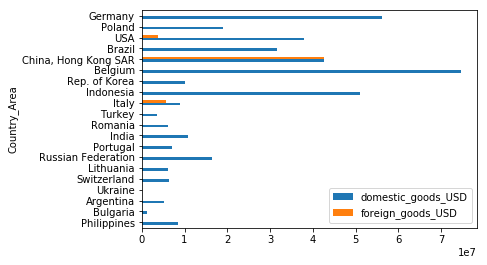

In [32]:
def color(row):
    for row in domfor_usd['domestic_goods_USD']:
        return '#AF0714'
    else:
        return '#86909A'
    
bar_colors = [color(country) for country in domfor_usd]

domfor_usd.plot(kind='barh',x='Country_Area')

In [33]:
#df[['col1', 'col2', 'col3']]

In [34]:
df_2017.USD.sum()

29247913937.43511

In [35]:
top20_usd17.usd_2017.sum()

25975963140.33333

In [36]:
round(top20_usd17.usd_2017.sum()/df_2017.USD.sum()*100)

89.0

In [37]:
test2 = pd.merge(top20_usd17, domfor_usd, on='Country_Area')
test2.head()

,Country_Area,usd_2017,domestic_goods_USD,foreign_goods_USD
0,Philippines,277496260.00,8421631.00,0.00
1,Bulgaria,292856145.72,1227459.86,0.00
2,Argentina,322269829.52,5232511.53,0.00
3,Ukraine,355730145.18,165572.80,0.00
4,Switzerland,548545302.90,6468788.41,0.00


In [38]:
test3 = pd.merge(test2, df_2017, on='Country_Area')
test3.head()

,Country_Area,usd_2017,domestic_goods_USD,foreign_goods_USD,Year,Commodity,Flow,USD,Weight,Flow2
0,Philippines,277496260.00,8421631.00,0.00,2017,"Tobacco, unmanufactured, not stemmed or stripped",Export,12625948.00,3173914.31,domestic
1,Philippines,277496260.00,8421631.00,0.00,2017,"Tobacco, unmanufactured, stemmed or stripped",Export,80555506.00,51051987.50,domestic
2,Philippines,277496260.00,8421631.00,0.00,2017,Tobacco refuse,Export,7274059.00,5229190.00,domestic
3,Philippines,277496260.00,8421631.00,0.00,2017,"Cigars, cheroots and cigarillos, containing tobacco",Export,484461.00,37614.29,domestic
4,Philippines,277496260.00,8421631.00,0.00,2017,Cigarettes containing tobacco,Export,122726754.00,15951575.27,domestic


In [39]:
by_com = test3.groupby(['Country_Area','Commodity','Flow2']).USD.median().unstack().reset_index().fillna(0)
#by_com['total'] = by_commodity.sum(axis=1)
by_com.head()

Flow2,Country_Area,Commodity,domestic,foreign
0,Argentina,Cigarette or pipe tobacco and tobacco substitute mixe,4835191.78,0.00
1,Argentina,Cigarettes containing tobacco,14169753.82,0.00
2,Argentina,"Cigars, cheroots and cigarillos, containing tobacco",3383.77,0.00
3,Argentina,Homogenized or reconstituted tobacco,2668.00,0.00
4,Argentina,"Products of tobacco, substitute nes, extract, essence",35500.43,0.00


In [40]:
by_com['total'] = by_com.sum(axis=1)
by_com.head()

Flow2,Country_Area,Commodity,domestic,foreign,total
0,Argentina,Cigarette or pipe tobacco and tobacco substitute mixe,4835191.78,0.00,4835191.78
1,Argentina,Cigarettes containing tobacco,14169753.82,0.00,14169753.82
2,Argentina,"Cigars, cheroots and cigarillos, containing tobacco",3383.77,0.00,3383.77
3,Argentina,Homogenized or reconstituted tobacco,2668.00,0.00,2668.00
4,Argentina,"Products of tobacco, substitute nes, extract, essence",35500.43,0.00,35500.43


In [41]:
by_com.sort_values(by='total',inplace=True)
by_com.head()

Flow2,Country_Area,Commodity,domestic,foreign,total
93,Poland,Homogenized or reconstituted tobacco,216.00,0.00,216.00
92,Poland,"Cigars, cheroots, cigarettes, with tobacco substitute",290.00,0.00,290.00
78,Lithuania,Tobacco refuse,869.00,0.00,869.00
29,Bulgaria,Homogenized or reconstituted tobacco,1488.18,0.00,1488.18
3,Argentina,Homogenized or reconstituted tobacco,2668.00,0.00,2668.00


In [42]:
by_com.drop(columns='total',inplace=True)
by_com.head(1)

Flow2,Country_Area,Commodity,domestic,foreign
93,Poland,Homogenized or reconstituted tobacco,216.00,0.00


In [43]:
dom = by_com[['Country_Area','Commodity','domestic']]
dom.head()

Flow2,Country_Area,Commodity,domestic
93,Poland,Homogenized or reconstituted tobacco,216.00
92,Poland,"Cigars, cheroots, cigarettes, with tobacco substitute",290.00
78,Lithuania,Tobacco refuse,869.00
29,Bulgaria,Homogenized or reconstituted tobacco,1488.18
3,Argentina,Homogenized or reconstituted tobacco,2668.00


In [44]:
foreign = by_com[['Country_Area','Commodity','foreign']]
foreign.head(1)

Flow2,Country_Area,Commodity,foreign
93,Poland,Homogenized or reconstituted tobacco,0.00


In [45]:
dom = dom.groupby(['Country_Area','Commodity']).domestic.median().unstack().reset_index().fillna(0)
dom.head(1)
#plot(kind='barh',x='Country_Area',stacked=True,figsize=(5,30))

Commodity,Country_Area,Cigarette or pipe tobacco and tobacco substitute mixe,Cigarettes containing tobacco,"Cigars, cheroots and cigarillos, containing tobacco","Cigars, cheroots, cigarettes, with tobacco substitute",Homogenized or reconstituted tobacco,"Products of tobacco, substitute nes, extract, essence",Tobacco refuse,"Tobacco, unmanufactured, not stemmed or stripped","Tobacco, unmanufactured, stemmed or stripped"
0,Argentina,4835191.78,14169753.82,3383.77,0.00,2668.00,35500.43,10458316.40,5629831.27,287135184.05


In [46]:
for_goods = foreign.groupby(['Country_Area','Commodity']).foreign.median().unstack().reset_index().fillna(0)
for_goods.head(1)

Commodity,Country_Area,Cigarette or pipe tobacco and tobacco substitute mixe,Cigarettes containing tobacco,"Cigars, cheroots and cigarillos, containing tobacco","Cigars, cheroots, cigarettes, with tobacco substitute",Homogenized or reconstituted tobacco,"Products of tobacco, substitute nes, extract, essence",Tobacco refuse,"Tobacco, unmanufactured, not stemmed or stripped","Tobacco, unmanufactured, stemmed or stripped"
0,Argentina,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [47]:
dom['total'] = dom.sum(axis=1)
dom.head()

Commodity,Country_Area,Cigarette or pipe tobacco and tobacco substitute mixe,Cigarettes containing tobacco,"Cigars, cheroots and cigarillos, containing tobacco","Cigars, cheroots, cigarettes, with tobacco substitute",Homogenized or reconstituted tobacco,"Products of tobacco, substitute nes, extract, essence",Tobacco refuse,"Tobacco, unmanufactured, not stemmed or stripped","Tobacco, unmanufactured, stemmed or stripped",total
0,Argentina,4835191.78,14169753.82,3383.77,0.00,2668.00,35500.43,10458316.40,5629831.27,287135184.05,322269829.52
1,Belgium,219709972.04,74518445.92,348435828.54,255812.42,55937121.64,29764721.18,37808658.91,205485049.34,731999162.38,1703914772.37
2,Brazil,45916339.00,13382704.00,294006.00,0.00,8892273.00,23234177.00,44702804.00,40026121.00,1915712087.00,2092160511.00
3,Bulgaria,5413926.11,146931416.88,1227459.86,37448.98,1488.18,283002.31,303541.68,114482403.89,24175457.82,292856145.72
4,"China, Hong Kong SAR",4251504.92,1000395735.09,80970823.99,0.00,0.00,0.00,0.00,0.00,8884.94,1085626948.94


In [48]:
dom.total.sum()

24337694180.970585

In [49]:
round(dom.total.sum()/top20_usd17.usd_2017.sum()*100)

94.0

In [50]:
for_goods['total'] = for_goods.sum(axis=1)
for_goods.head(1)

Commodity,Country_Area,Cigarette or pipe tobacco and tobacco substitute mixe,Cigarettes containing tobacco,"Cigars, cheroots and cigarillos, containing tobacco","Cigars, cheroots, cigarettes, with tobacco substitute",Homogenized or reconstituted tobacco,"Products of tobacco, substitute nes, extract, essence",Tobacco refuse,"Tobacco, unmanufactured, not stemmed or stripped","Tobacco, unmanufactured, stemmed or stripped",total
0,Argentina,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [51]:
dom.sort_values(by='total',inplace=True)
dom.head()

Commodity,Country_Area,Cigarette or pipe tobacco and tobacco substitute mixe,Cigarettes containing tobacco,"Cigars, cheroots and cigarillos, containing tobacco","Cigars, cheroots, cigarettes, with tobacco substitute",Homogenized or reconstituted tobacco,"Products of tobacco, substitute nes, extract, essence",Tobacco refuse,"Tobacco, unmanufactured, not stemmed or stripped","Tobacco, unmanufactured, stemmed or stripped",total
10,Philippines,5765834.00,122726754.00,484461.00,1449601.00,38192466.00,8421631.00,7274059.00,12625948.00,80555506.00,277496260.00
3,Bulgaria,5413926.11,146931416.88,1227459.86,37448.98,1488.18,283002.31,303541.68,114482403.89,24175457.82,292856145.72
0,Argentina,4835191.78,14169753.82,3383.77,0.00,2668.00,35500.43,10458316.40,5629831.27,287135184.05,322269829.52
19,Ukraine,61383915.83,293370185.55,480290.13,20526.73,0.00,101202.42,218192.12,42878.91,112953.49,355730145.18
16,Switzerland,6468788.41,487152914.69,8333818.71,34455.19,2642998.30,31675182.17,200588.96,203529.03,11833027.44,548545302.90


In [52]:
for_goods.sort_values(by='total',inplace=True)
for_goods.head(1)

Commodity,Country_Area,Cigarette or pipe tobacco and tobacco substitute mixe,Cigarettes containing tobacco,"Cigars, cheroots and cigarillos, containing tobacco","Cigars, cheroots, cigarettes, with tobacco substitute",Homogenized or reconstituted tobacco,"Products of tobacco, substitute nes, extract, essence",Tobacco refuse,"Tobacco, unmanufactured, not stemmed or stripped","Tobacco, unmanufactured, stemmed or stripped",total
0,Argentina,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [53]:
dom.drop(columns='total',inplace=True)
dom.head()

Commodity,Country_Area,Cigarette or pipe tobacco and tobacco substitute mixe,Cigarettes containing tobacco,"Cigars, cheroots and cigarillos, containing tobacco","Cigars, cheroots, cigarettes, with tobacco substitute",Homogenized or reconstituted tobacco,"Products of tobacco, substitute nes, extract, essence",Tobacco refuse,"Tobacco, unmanufactured, not stemmed or stripped","Tobacco, unmanufactured, stemmed or stripped"
10,Philippines,5765834.00,122726754.00,484461.00,1449601.00,38192466.00,8421631.00,7274059.00,12625948.00,80555506.00
3,Bulgaria,5413926.11,146931416.88,1227459.86,37448.98,1488.18,283002.31,303541.68,114482403.89,24175457.82
0,Argentina,4835191.78,14169753.82,3383.77,0.00,2668.00,35500.43,10458316.40,5629831.27,287135184.05
19,Ukraine,61383915.83,293370185.55,480290.13,20526.73,0.00,101202.42,218192.12,42878.91,112953.49
16,Switzerland,6468788.41,487152914.69,8333818.71,34455.19,2642998.30,31675182.17,200588.96,203529.03,11833027.44


In [54]:
for_goods.drop(columns='total',inplace=True)
for_goods.head(1)

Commodity,Country_Area,Cigarette or pipe tobacco and tobacco substitute mixe,Cigarettes containing tobacco,"Cigars, cheroots and cigarillos, containing tobacco","Cigars, cheroots, cigarettes, with tobacco substitute",Homogenized or reconstituted tobacco,"Products of tobacco, substitute nes, extract, essence",Tobacco refuse,"Tobacco, unmanufactured, not stemmed or stripped","Tobacco, unmanufactured, stemmed or stripped"
0,Argentina,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Text(0.13,1.05,'Dollar value is 94% of their total earnings for the top-20 countries')

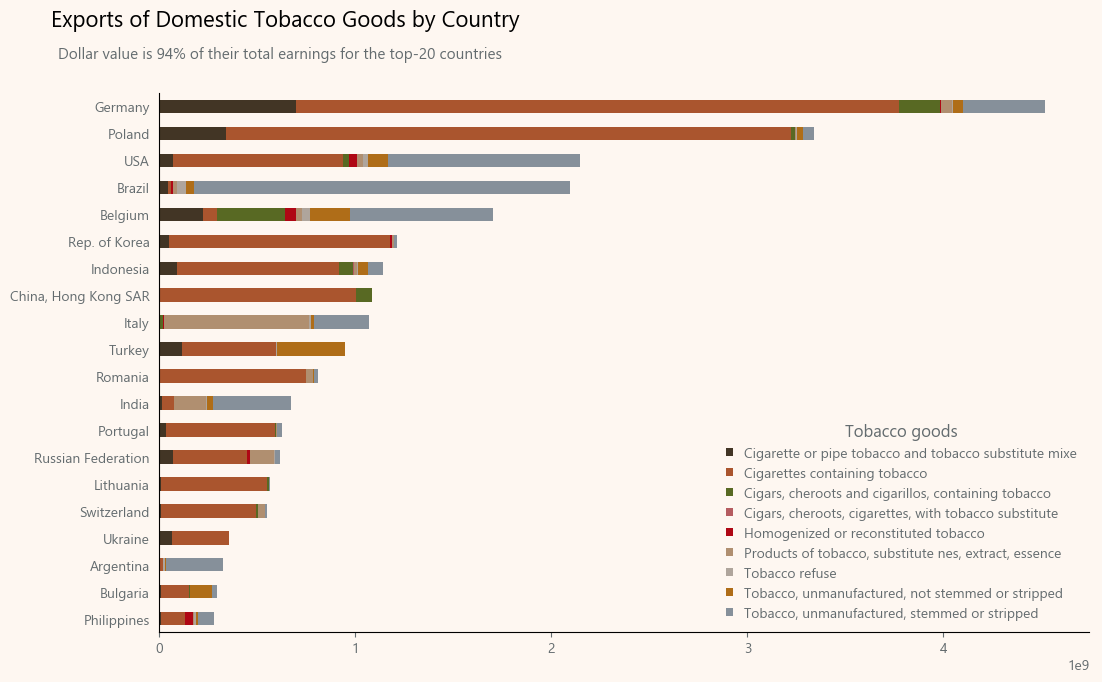

In [56]:
# def get_words(value):
#      if value == '5':
#         return "{} billions (US$)".format(billions)
#      else: 
#         return "{}".format(billions)

# formatter = FuncFormatter(get_words)

ax = dom.plot(kind='barh',x='Country_Area',stacked=True, figsize=(12,7))

plt.rcdefaults()
plt.rcParams.update({
    'axes.prop_cycle': cycler('color', ['#423525','#AA552E','#586923','#B55C60','#AF0714','#B08F70','#AFA59C','#AF6D18','#86909A']),
    'axes.facecolor': '#FEF7F1',
    'savefig.facecolor': '#FEF7F1',
    'figure.facecolor': '#FEF7F1',
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
    #'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': False,
    'xtick.bottom': True,
    'xtick.color': '#646C6F',
    'ytick.color':'#646C6F',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
     'legend.frameon': False,
     'legend.fontsize': 'small',
     'legend.handlelength': 0.5,
     'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Segoe UI Symbol',
    'font.size':12,
    'text.color':'#646C6F'
     })


ax.set_xlabel('something',fontsize=12,fontname="Segoe UI Symbol")
ax.set_ylabel("something",fontsize=12,fontname="Segoe UI Symbol")
ax.axes.labelpad: 4.0
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=False)
ax.legend(title='Tobacco goods')
# ax.set_xlim(0,5)
# ax.set_xticks([0,1,2,3,4,5])
# ax.set_xticklabels(['0','1','2','3','4','5 billion USD'],color='#646C6F')

# ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(True)
# ax.spines['bottom'].set_visible(True)
# ax.spines['right'].set_visible(False)
# ax.set_yticks([0,10,20,30,40,50,60])
# ax.set_yticklabels(['0','','20','','40','','60'],color='#646C6F')

title_string = "Exports of Domestic Tobacco Goods by Country"
subtitle_string = "Dollar value is 94% of their total earnings for the top-20 countries"
plt.suptitle(title_string, y=1, x=0.23, fontsize=16,color='black')
plt.title(subtitle_string, y=1.05, x=0.13, fontsize=11)


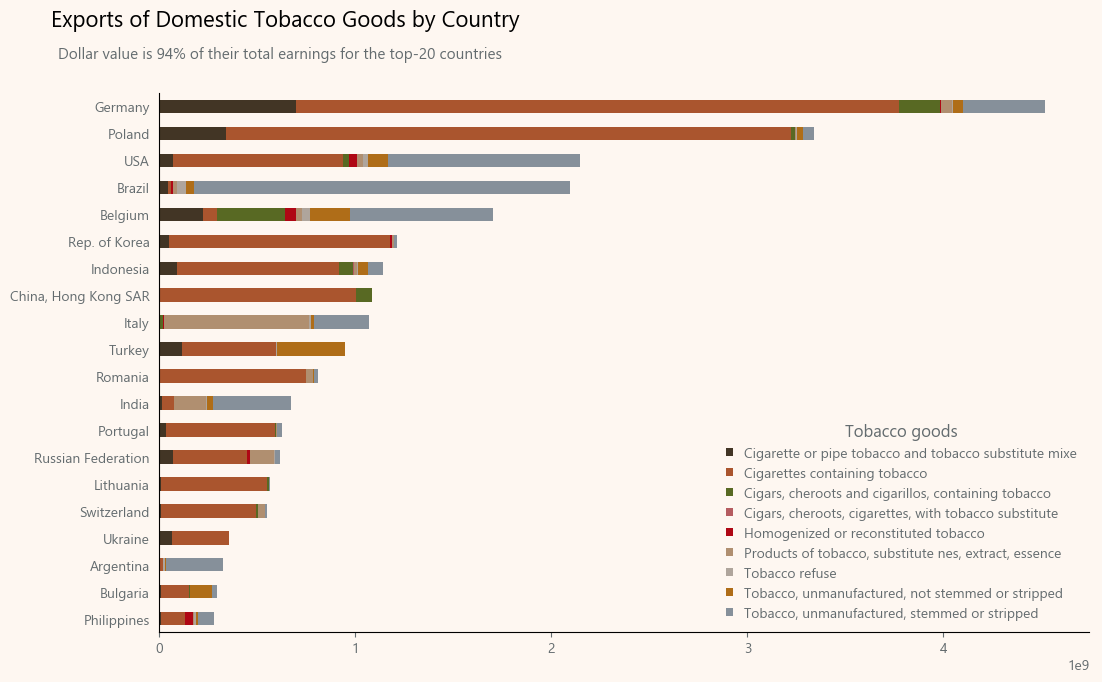

In [57]:
# def get_words(value):
#      if value == '5':
#         return "{} billions (US$)".format(billions)
#      else: 
#         return "{}".format(billions)

# formatter = FuncFormatter(get_words)

ax = dom.plot(kind='barh',x='Country_Area',stacked=True, figsize=(12,7))

plt.rcdefaults()
plt.rcParams.update({
    'axes.prop_cycle': cycler('color', ['#423525','#AA552E','#586923','#B55C60','#AF0714','#B08F70','#AFA59C','#AF6D18','#86909A']),
    'axes.facecolor': '#FEF7F1',
    'savefig.facecolor': '#FEF7F1',
    'figure.facecolor': '#FEF7F1',
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
    #'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': False,
    'xtick.bottom': True,
    'xtick.color': '#646C6F',
    'ytick.color':'#646C6F',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
     'legend.frameon': False,
     'legend.fontsize': 'small',
     'legend.handlelength': 0.5,
     'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Segoe UI Symbol',
    'font.size':12,
    'text.color':'#646C6F'
     })


ax.set_xlabel('something',fontsize=12,fontname="Segoe UI Symbol")
ax.set_ylabel("something",fontsize=12,fontname="Segoe UI Symbol")
ax.axes.labelpad: 4.0
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=False)
ax.legend(title='Tobacco goods')
# ax.set_xlim(0,5)
# ax.set_xticks([0,1,2,3,4,5])
# ax.set_xticklabels(['0','1','2','3','4','5 billion USD'],color='#646C6F')

# ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(True)
# ax.spines['bottom'].set_visible(True)
# ax.spines['right'].set_visible(False)
# ax.set_yticks([0,10,20,30,40,50,60])
# ax.set_yticklabels(['0','','20','','40','','60'],color='#646C6F')

title_string = "Exports of Domestic Tobacco Goods by Country"
subtitle_string = "Dollar value is 94% of their total earnings for the top-20 countries"
plt.suptitle(title_string, y=1, x=0.23, fontsize=16,color='black')
plt.title(subtitle_string, y=1.05, x=0.13, fontsize=11)

plt.savefig("domestic-goods.pdf")
plt.show()

# plt.suptitle(title_string, y=1, x=0.14, fontsize=16,color='black')
# plt.title(subtitle_string, y=1.02, x=0.3, fontsize=11)

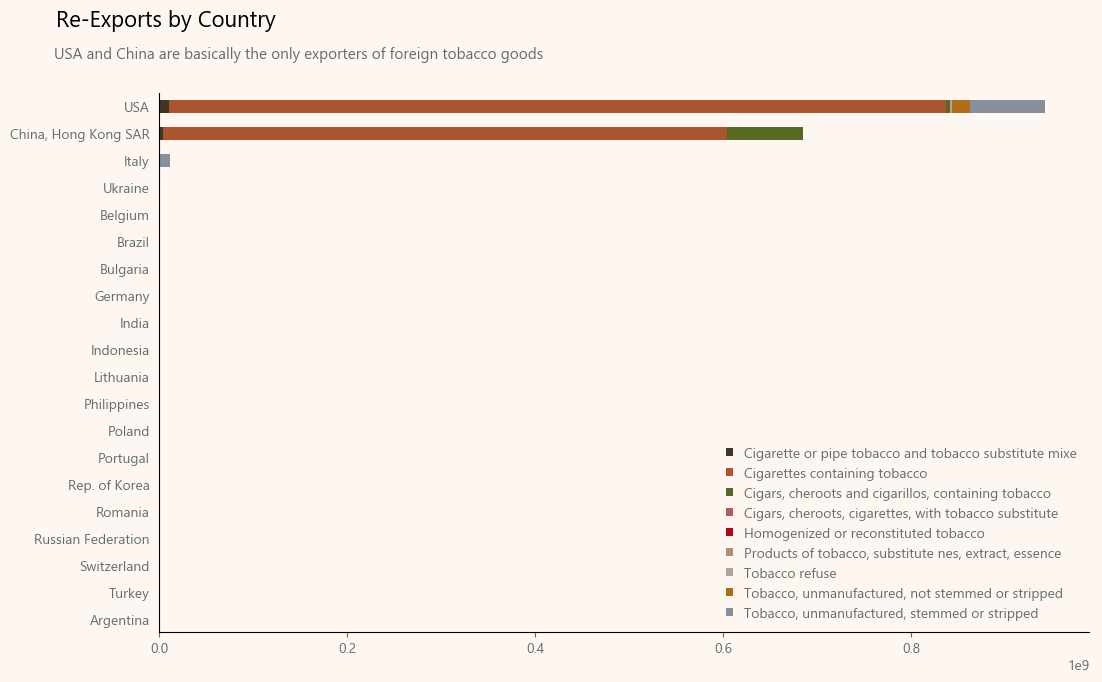

In [58]:
#for_goods.plot(kind='barh',x='Country_Area',stacked=True, figsize=(12,7))

ax = for_goods.plot(kind='barh',x='Country_Area',stacked=True, figsize=(12,7))

plt.rcdefaults()
plt.rcParams.update({
    'axes.prop_cycle': cycler('color', ['#423525','#AA552E','#586923','#B55C60','#AF0714','#B08F70','#AFA59C','#AF6D18','#86909A']),
    'axes.facecolor': '#FEF7F1',
    'savefig.facecolor': '#FEF7F1',
    'figure.facecolor': '#FEF7F1',
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
    #'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': False,
    'xtick.bottom': True,
    'xtick.color': '#646C6F',
    'ytick.color':'#646C6F',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
     'legend.frameon': False,
     'legend.fontsize': 'small',
     'legend.handlelength': 0.5,
     'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Segoe UI Symbol',
    'font.size':12,
    'text.color':'#646C6F'
     })


ax.set_xlabel('something',fontsize=12,fontname="Segoe UI Symbol")
ax.set_ylabel("something",fontsize=12,fontname="Segoe UI Symbol")
ax.axes.labelpad: 4.0
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=False)
ax.legend(title='Tobacco goods')
ax.legend(loc='lower right')
# ax.set_xlim(0,5)
# ax.set_xticks([0,1,2,3,4,5])
# ax.set_xticklabels(['0','1','2','3','4','5 billion USD'],color='#646C6F')

# ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(True)
# ax.spines['bottom'].set_visible(True)
# ax.spines['right'].set_visible(False)
# ax.set_yticks([0,10,20,30,40,50,60])
# ax.set_yticklabels(['0','','20','','40','','60'],color='#646C6F')

title_string = "Re-Exports by Country"
subtitle_string = "USA and China are basically the only exporters of foreign tobacco goods"
plt.suptitle(title_string, y=1, x=0.13, fontsize=16,color='black')
plt.title(subtitle_string, y=1.05, x=0.15, fontsize=11)

plt.savefig("re-exports_foreign-goods.pdf")
plt.show()

In [66]:
#======================= IGNORE WHAT FOLLOWS UNTIL NEXT SIMILAR NOTE =====================================

In [60]:
test = pd.merge(top20_usd17, df_2017, on='Country_Area')
test.head()
#test.groupby('Country_Area').USD.plot(kind='bar',stacked=True)

,Country_Area,usd_2017,Year,Commodity,Flow,USD,Weight,Flow2
0,Philippines,277496260.00,2017,"Tobacco, unmanufactured, not stemmed or stripped",Export,12625948.00,3173914.31,domestic
1,Philippines,277496260.00,2017,"Tobacco, unmanufactured, stemmed or stripped",Export,80555506.00,51051987.50,domestic
2,Philippines,277496260.00,2017,Tobacco refuse,Export,7274059.00,5229190.00,domestic
3,Philippines,277496260.00,2017,"Cigars, cheroots and cigarillos, containing tobacco",Export,484461.00,37614.29,domestic
4,Philippines,277496260.00,2017,Cigarettes containing tobacco,Export,122726754.00,15951575.27,domestic


In [61]:
test_1 = test[['Country_Area', 'Commodity', 'USD']]
test_1.head()

,Country_Area,Commodity,USD
0,Philippines,"Tobacco, unmanufactured, not stemmed or stripped",12625948.00
1,Philippines,"Tobacco, unmanufactured, stemmed or stripped",80555506.00
2,Philippines,Tobacco refuse,7274059.00
3,Philippines,"Cigars, cheroots and cigarillos, containing tobacco",484461.00
4,Philippines,Cigarettes containing tobacco,122726754.00


In [62]:
by_commodity = test_1.groupby(['Country_Area','Commodity']).USD.median().unstack().reset_index().fillna(0)
by_commodity['total'] = by_commodity.sum(axis=1)
by_commodity.head()

Commodity,Country_Area,Cigarette or pipe tobacco and tobacco substitute mixe,Cigarettes containing tobacco,"Cigars, cheroots and cigarillos, containing tobacco","Cigars, cheroots, cigarettes, with tobacco substitute",Homogenized or reconstituted tobacco,"Products of tobacco, substitute nes, extract, essence",Tobacco refuse,"Tobacco, unmanufactured, not stemmed or stripped","Tobacco, unmanufactured, stemmed or stripped",total
0,Argentina,4835191.78,14169753.82,3383.77,0.00,2668.00,35500.43,10458316.40,5629831.27,287135184.05,322269829.52
1,Belgium,219709972.04,74518445.92,348435828.54,255812.42,55937121.64,29764721.18,37808658.91,205485049.34,731999162.38,1703914772.37
2,Brazil,45916339.00,13382704.00,294006.00,0.00,8892273.00,23234177.00,44702804.00,40026121.00,1915712087.00,2092160511.00
3,Bulgaria,5413926.11,146931416.88,1227459.86,37448.98,1488.18,283002.31,303541.68,114482403.89,24175457.82,292856145.72
4,"China, Hong Kong SAR",4251504.92,799779275.78,80953424.12,0.00,0.00,0.00,0.00,0.00,8884.94,884993089.75


In [63]:
by_commodity.sort_values(by='total',inplace=True)
by_commodity.head(1)

Commodity,Country_Area,Cigarette or pipe tobacco and tobacco substitute mixe,Cigarettes containing tobacco,"Cigars, cheroots and cigarillos, containing tobacco","Cigars, cheroots, cigarettes, with tobacco substitute",Homogenized or reconstituted tobacco,"Products of tobacco, substitute nes, extract, essence",Tobacco refuse,"Tobacco, unmanufactured, not stemmed or stripped","Tobacco, unmanufactured, stemmed or stripped",total
10,Philippines,5765834.00,122726754.00,484461.00,1449601.00,38192466.00,8421631.00,7274059.00,12625948.00,80555506.00,277496260.00


In [64]:
by_commodity.drop(columns='total',inplace=True)
by_commodity.head(1)

Commodity,Country_Area,Cigarette or pipe tobacco and tobacco substitute mixe,Cigarettes containing tobacco,"Cigars, cheroots and cigarillos, containing tobacco","Cigars, cheroots, cigarettes, with tobacco substitute",Homogenized or reconstituted tobacco,"Products of tobacco, substitute nes, extract, essence",Tobacco refuse,"Tobacco, unmanufactured, not stemmed or stripped","Tobacco, unmanufactured, stemmed or stripped"
10,Philippines,5765834.00,122726754.00,484461.00,1449601.00,38192466.00,8421631.00,7274059.00,12625948.00,80555506.00


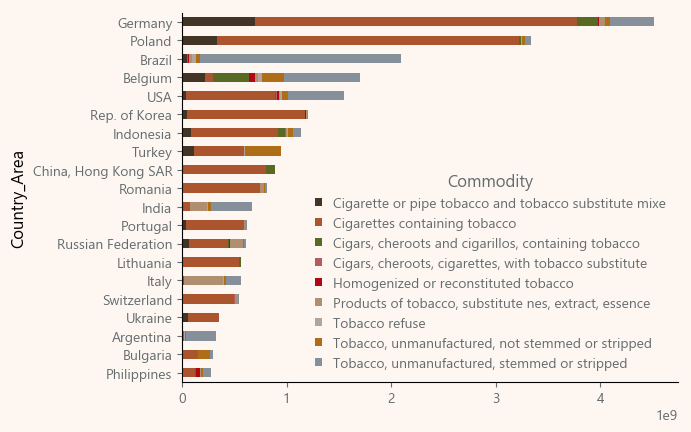

In [65]:
by_commodity.plot(kind='barh',x='Country_Area', stacked=True)

In [67]:
#test_1.pivot(index='Commodity',columns='Country_Area',values='USD')
#test_1

In [68]:
# test_1.pivot(index='Country_Area',columns='Commodity',values='USD')
# test_1

In [69]:
#long_df.pivot(index='year', columns='continent', values='visas').head()

In [70]:
# by_commodity = test.groupby('Country_Area').Commodity.value_counts().sort_index(ascending=False).unstack().reset_index().fillna(0)
# by_commodity.head()

In [71]:
test.Commodity.value_counts()

Tobacco, unmanufactured, stemmed or stripped             23
Cigarettes containing tobacco                            22
Cigarette or pipe tobacco and tobacco substitute mixe    22
Cigars, cheroots and cigarillos, containing tobacco      21
Products of tobacco, substitute nes, extract, essence    21
Tobacco refuse                                           20
Tobacco, unmanufactured, not stemmed or stripped         19
Homogenized or reconstituted tobacco                     15
Cigars, cheroots, cigarettes, with tobacco substitute    14
Name: Commodity, dtype: int64

In [72]:
#test.groupby('Country_Area').Commodity.value_counts()

In [76]:
#test[test['Commodity'] == 'Cigarette or pipe tobacco and tobacco substitute mixe']

In [77]:
# import numpy as np
# from matplotlib import rc


In [78]:
# rc('font', weight='bold')

In [79]:
# # Values of each group
# bars1 = [47142234, 28146464,100581600]
# bars2 = [3077966524	, 2883306103, 870849084]
# bars3 = [697079619, 339323740, 67197135]
# #bars4 = []

In [80]:
# # Heights of bars1 + bars2 (TO DO better)
# bars = [40, 35, 17] #, 12, 32]
 
# # The position of the bars on the x-axis
# r = [0,1,2,3] #,4]
 
# # Names of group and bar width
# names = ['A','B','C','D'] #,'E']
# barWidth = 1


In [81]:
# # Create brown bars
# plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# # Create green bars (middle), on top of the firs ones
# plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
# # Create green bars (top)
# plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)
 
# # Custom X axis
# plt.xticks(r, names, fontweight='bold')
# plt.xlabel("group")
 
# # Show graphic
# plt.show()


In [82]:
#test.Commodity.value_counts()

In [83]:
# test[test['Commodity'] == 'Tobacco, unmanufactured, stemmed or stripped'].USD

In [84]:
# ger_com = [47142234, 421106891, 6639470] #, 207915273, 3077966524, 176404, 697079619, 4916856, 56188495]
# bars1 = test[test['Commodity'] == 'Tobacco, unmanufactured, stemmed or stripped'].USD

In [85]:
# number = 47142234+421106891

In [86]:
# # Heights of bars1 + bars2 (TO DO better)
# bars = [number] #, 35, 17, 12, 32]
 
# # The position of the bars on the x-axis
# r = [0] #,1,2,3,4]

# names = ['Germany'] #,'B','C','D','E']
# barWidth = 0.03

# # Create brown bars
# plt.bar(r,47142234 , color='yellow', edgecolor='white', width=barWidth)
# # Create green bars (middle), on top of the firs ones
# plt.bar(r, 421106891, bottom=47142234, color='blue', edgecolor='white', width=barWidth)
# # Create green bars (top)
# plt.bar(r, 6639470, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)
 
# # Custom X axis
# plt.xticks(r, names, fontweight='bold')
# plt.xlabel("group")
 
# # Show graphic
# plt.show()




In [87]:
# by_commodity = test.groupby('Country_Area').Commodity.value_counts().unstack().reset_index().fillna(0)
# by_commodity

In [88]:
# ger = test[test['Country_Area'] == 'Germany']
# ger.plot

In [89]:
#colors = ['#423525','#AA552E','#586923','#AF0714','#86909A','#B08F70']

In [90]:
# ==================== STOP IGNORING THINGS AND GO BACK TO THE DELIVERABLE ==========================

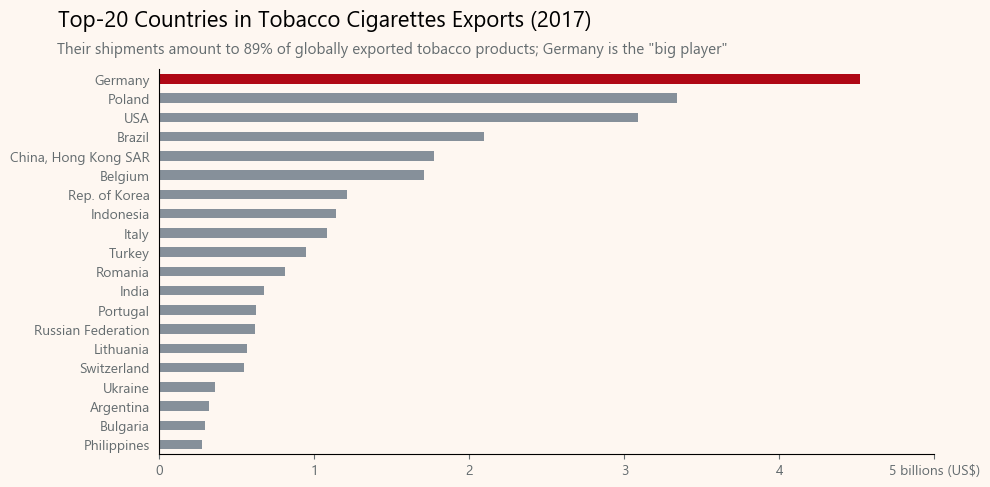

In [91]:
#color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]

def color(country):
    if country == 'Germany':
        return '#AF0714'
    else:
        return '#86909A'
    
bar_colors = [color(country) for country in top20_usd17.Country_Area]


# STEP ONE: Build a function
# it should take value and pos
def with_words(value, pos):
    billions = int(value / 1000000000)
    if billions == 5:
        return "{} billions (US$)".format(billions)
    else: 
        return "{}".format(billions)

# # STEP TWO: Use FuncFormatter with that function???
formatter = FuncFormatter(with_words)

# ax = world.plot(x='city', y='people', kind='bar')

# # STEP THREE: Give the axis your formatter
# ax.yaxis.set_major_formatter(formatter)


ax = top20_usd17.plot(kind='barh', x='Country_Area', y='usd_2017',figsize=(10, 5),color=bar_colors)
ax.xaxis.set_major_formatter(formatter)

#,'#AA552E','#586923','#AF0714','#86909A','#B08F70
# CUSTOMIZATION CODE GOES UNDER HERE

ax.set_xlabel('something',fontsize=12,fontname="Leelawadee UI")
ax.set_ylabel('something',fontsize=12,fontname="Leelawadee UI")
ax.axes.labelpad: 4.0
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(True)
# ax.spines['right'].set_visible(False)
# ax.set_xticks([0,1,2,3,4,5])
# ax.set_xticklabels(['0','','1','','2','','3','','5 billion USD'],color='#646C6F')
ax.set_xlim(0,5000000000)
ax.legend_.remove()

title_string = "Top-20 Countries in Tobacco Cigarettes Exports (2017)"
subtitle_string = 'Their shipments amount to 89% of globally exported tobacco products; Germany is the "big player"'
#'Germany is the "big player" amongst the counties that earnt the 89% dollar value of globally exported tobacco cigarettes during 2017'
plt.suptitle(title_string, y=1, x=0.29, fontsize=16,color='black')
plt.title(subtitle_string, y=1.02, x=0.3, fontsize=11)

plt.rcdefaults()
plt.rcParams.update({
    #ERROR: 'NameError: name 'cycler' is not defined'
    'axes.prop_cycle': cycler('color', ['#423525', 'yellow', 'blue']),
    'axes.facecolor': '#FEF7F1',
    'savefig.facecolor': '#FEF7F1',
    'figure.facecolor': '#FEF7F1',
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
    #'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': False,
    'xtick.bottom': True,
    'xtick.color': '#646C6F',
    'ytick.color':'#646C6F',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
    'legend.frameon': False,
    'legend.fontsize': 'small',
    'legend.handlelength': 0.5,
    'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Segoe UI Symbol',
    'font.size':12,
    'text.color':'#646C6F'
     })

# ax.set_xlabel('GDP per capita',fontsize=12,fontname="Leelawadee UI")
# ax.set_ylabel('Life expectancy',fontsize=12,fontname="Leelawadee UI")
# ax.axes.labelpad: 4.0

ax.tick_params(axis='y',left=False)

# then we save it
plt.savefig("top-20-exporters-2017.pdf")
plt.show()

In [92]:
#top20_usd17.plot(kind='barh')

In [93]:
usd_2017 = df_2017.groupby('Country_Area')['USD'].sum().reset_index(name='usd_2017')
top20_usd17 = usd_2017.sort_values(by='usd_2017', ascending=True).tail(20)
top20_usd17.tail()

,Country_Area,usd_2017
10,"China, Hong Kong SAR",1769986179.50
6,Brazil,2092160511.00
54,USA,3089718026.00
39,Poland,3340492853.00
18,Germany,4519131766.27


In [94]:
weight_2017 = df_2017.groupby('Country_Area')['Weight'].sum().reset_index(name='weight_2017')
top20_weight17 = weight_2017.sort_values(by='weight_2017',ascending=True).tail(20)
top20_weight17.tail()

,Country_Area,weight_2017
54,USA,194537171.00
4,Belgium,205661810.42
39,Poland,236983121.80
18,Germany,273628444.00
6,Brazil,462219920.00


In [95]:
df_2017

,Country_Area,Year,Commodity,Flow,USD,Weight,Flow2
198,Algeria,2017,Cigarettes containing tobacco,Export,11974.74,865.81,domestic
200,Algeria,2017,"Products of tobacco, substitute nes, extract, essence",Export,5808.69,410.00,domestic
821,Argentina,2017,"Tobacco, unmanufactured, not stemmed or stripped",Export,5629831.27,2276578.90,domestic
823,Argentina,2017,"Tobacco, unmanufactured, stemmed or stripped",Export,287135184.05,60726136.60,domestic
825,Argentina,2017,Tobacco refuse,Export,10458316.40,20653260.00,domestic
827,Argentina,2017,"Cigars, cheroots and cigarillos, containing tobacco",Export,3383.77,63.83,domestic
829,Argentina,2017,Cigarettes containing tobacco,Export,14169753.82,1354991.46,domestic
831,Argentina,2017,Cigarette or pipe tobacco and tobacco substitute mixe,Export,4835191.78,1318024.90,domestic
833,Argentina,2017,Homogenized or reconstituted tobacco,Export,2668.00,239.40,domestic
835,Argentina,2017,"Products of tobacco, substitute nes, extract, essence",Export,35500.43,4097.90,domestic


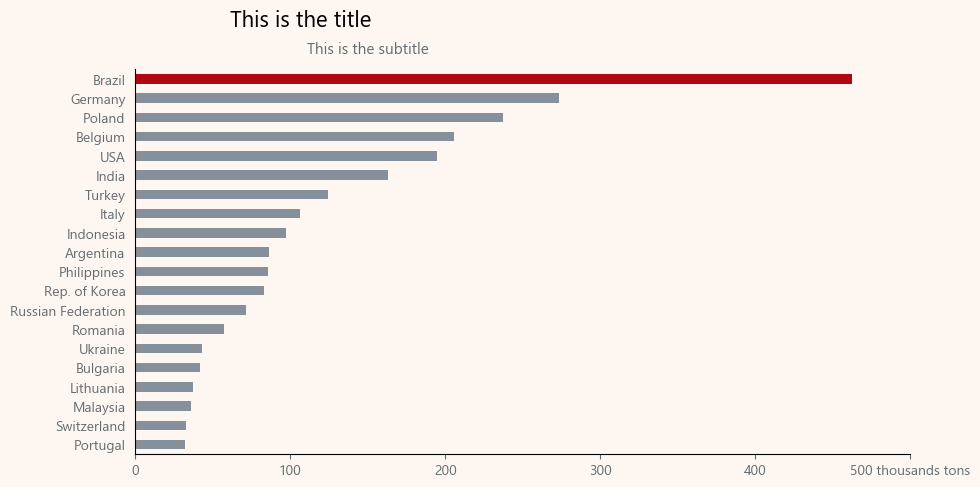

In [96]:
#color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]

def color_first(country):
    if country == 'Brazil':
        return '#AF0714'
    else:
        return '#86909A'
    
bar_colors = [color_first(country) for country in top20_weight17.Country_Area]


# STEP ONE: Build a function
#it should take value and pos
def with_tons(value, pos):
    tons = int(value / 1000000)
    if tons == 500:
        return "{} thousands tons".format(tons)
    else: 
        return "{}".format(tons)

# # # STEP TWO: Use FuncFormatter with that function???
formatter = FuncFormatter(with_tons)

# ax = world.plot(x='city', y='people', kind='bar')

# # STEP THREE: Give the axis your formatter
ax.yaxis.set_major_formatter(formatter)


ax = top20_weight17.plot(kind='barh', x='Country_Area', y='weight_2017',figsize=(10, 5),color=bar_colors)
ax.xaxis.set_major_formatter(formatter)

#,'#AA552E','#586923','#AF0714','#86909A','#B08F70
# CUSTOMIZATION CODE GOES UNDER HERE

ax.set_xlabel('something',fontsize=12,fontname="Leelawadee UI")
ax.set_ylabel('something',fontsize=12,fontname="Leelawadee UI")
ax.axes.labelpad: 4.0
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(True)
# ax.spines['right'].set_visible(False)
# ax.set_xticks([0,1,2,3,4,5])
# ax.set_xticklabels(['0','','1','','2','','3','','5 billion USD'],color='#646C6F')
ax.set_xlim(0,500000000)
ax.legend_.remove()

title_string = "This is the title"
subtitle_string = 'This is the subtitle'
#'Germany is the "big player" amongst the counties that earnt the 89% dollar value of globally exported tobacco cigarettes during 2017'
plt.suptitle(title_string, y=1, x=0.29, fontsize=16,color='black')
plt.title(subtitle_string, y=1.02, x=0.3, fontsize=11)

plt.rcdefaults()
plt.rcParams.update({
    #ERROR: 'NameError: name 'cycler' is not defined'
    'axes.prop_cycle': cycler('color', ['#423525', 'yellow', 'blue']),
    'axes.facecolor': '#FEF7F1',
    'savefig.facecolor': '#FEF7F1',
    'figure.facecolor': '#FEF7F1',
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
    #'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': False,
    'xtick.bottom': True,
    'xtick.color': '#646C6F',
    'ytick.color':'#646C6F',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
    'legend.frameon': False,
    'legend.fontsize': 'small',
    'legend.handlelength': 0.5,
    'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Segoe UI Symbol',
    'font.size':12,
    'text.color':'#646C6F'
     })

# ax.set_xlabel('GDP per capita',fontsize=12,fontname="Leelawadee UI")
# ax.set_ylabel('Life expectancy',fontsize=12,fontname="Leelawadee UI")
# ax.axes.labelpad: 4.0

ax.tick_params(axis='y',left=False)

# then we save it
# plt.savefig("personal-graph-bar-one-color.pdf")
plt.show()

In [97]:
merge = pd.merge(top20_usd17,weight_2017,on='Country_Area')
merge.head()

,Country_Area,usd_2017,weight_2017
0,Philippines,277496260.00,85363016.07
1,Bulgaria,292856145.72,41889947.18
2,Argentina,322269829.52,86333392.99
3,Ukraine,355730145.18,43353838.54
4,Switzerland,548545302.90,32666253.59


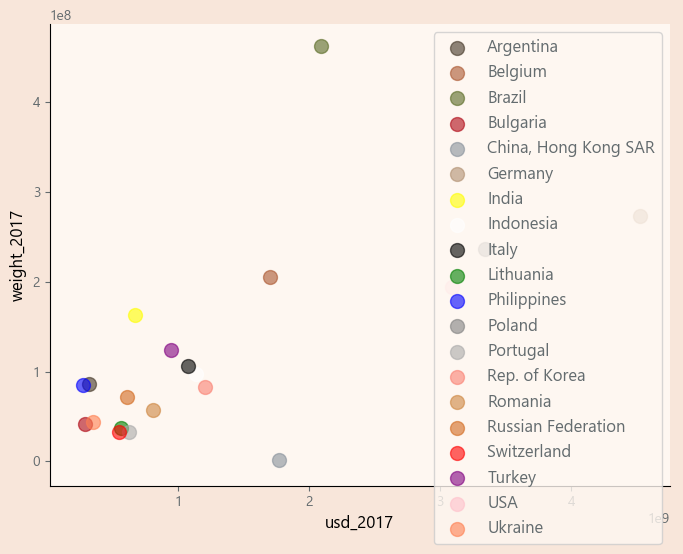

In [98]:
# fig, ax = plt.subplots(figsize=(8, 6))

# colors = list(reversed(plt.rcParams['axes.prop_cycle'].by_key()['color']))

# merge.groupby('Country_Area').plot(kind='scatter', x='usd_2017', y='weight_2017', color=colors.pop(), s=20, ax=ax, alpha=0.75)
#ax.legend_.remove()
plt.rcdefaults()
plt.rcParams.update({
    'axes.prop_cycle': cycler('color', ['#423525','#AA552E','#586923','#AF0714','#86909A','#B08F70','yellow','white','black','green','blue','grey','darkgrey','salmon','peru','chocolate','red','purple','pink','coral']),
    'axes.facecolor': '#FEF7F1',
    'savefig.facecolor': '#F8E6DA',
    #'#F8E6DA',
    'figure.facecolor': '#F8E6DA',
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
#     'axes.grid':True
#     'grid.color':'#ffffff',
#     'grid.linewidth':2,
#     'grid.alpha':0.6,
    'xtick.top': False,
    'xtick.bottom': True,
    'xtick.color': '#646C6F',
    'ytick.color':'#646C6F',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    #'legend.loc': 'best',
    #'legend.frameon': False,
    #'legend.columnspacing': 2.0,
    'font.family': 'Segoe UI Symbol',
    'font.size':12,
    'text.color':'#646C6F'
     })

# fig, ax = plt.subplots(figsize=(8, 6))

# # Don't touch this part of the code!
# colors = list(reversed(plt.rcParams['axes.prop_cycle'].by_key()['color']))

# groups = df.groupby('continent')
# for name, group in groups:
#     group.plot(kind='scatter', x='gdp_per_capita', y='life_expectancy', color=colors.pop(), label=name, s= 5 + (group.population / 200000), ax=ax, alpha=0.75)

# fig, ax = plt.subplots(figsize=(8, 6))

# colors = list(reversed(plt.rcParams['axes.prop_cycle'].by_key()['color']))

# merge.groupby('Country_Area').plot(kind='scatter', x='usd_2017', y='weight_2017', color='#423525', s=5, ax=ax, alpha=0.75)

fig, ax = plt.subplots(figsize=(8, 6))

# Don't touch this part of the code!
colors = list(reversed(plt.rcParams['axes.prop_cycle'].by_key()['color']))

groups = merge.groupby('Country_Area')
for name, group in groups:
    group.plot(kind='scatter', x='usd_2017', y='weight_2017', color=colors.pop(), label=name, s= 100, ax=ax, alpha=0.6)



#merge.groupby('Country_Area').plot(kind='scatter',x='usd_2017',y='weight_2017')

In [99]:
#merge.groupby('Country_Area').plot(kind='scatter',x='usd_2017',y='weight_2017'

In [100]:
df_2017.Weight.sum()

2735257753.456167

In [101]:
merge['weight_pct'] = (merge['weight_2017']/ df_2017.Weight.sum()) * 100
merge.head(1)

,Country_Area,usd_2017,weight_2017,weight_pct
0,Philippines,277496260.00,85363016.07,3.12


In [102]:
merge['ucd_pct'] = (merge['usd_2017']/ df_2017.USD.sum()) * 100
merge.head(1)

,Country_Area,usd_2017,weight_2017,weight_pct,ucd_pct
0,Philippines,277496260.00,85363016.07,3.12,0.95


In [103]:
pd.options.display.float_format = '{:.2f}'.format

In [104]:
usd_w_17 = merge[['Country_Area','usd_2017', 'weight_2017']]
usd_w_17['price_per_kg'] = usd_w_17['usd_2017']/usd_w_17['weight_2017']
usd_w_17

C:\Users\kellykiki\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Country_Area,usd_2017,weight_2017,price_per_kg
0,Philippines,277496260.00,85363016.07,3.25
1,Bulgaria,292856145.72,41889947.18,6.99
2,Argentina,322269829.52,86333392.99,3.73
3,Ukraine,355730145.18,43353838.54,8.21
4,Switzerland,548545302.90,32666253.59,16.79
5,Lithuania,563968538.00,37361463.02,15.09
6,Russian Federation,616166205.00,71583880.72,8.61
7,Portugal,624836275.59,32197892.11,19.41
8,India,673506406.92,163004205.58,4.13
9,Romania,808751319.19,57439850.58,14.08


In [105]:
usdw_pct_17 = merge[['Country_Area','weight_pct','ucd_pct']]
usdw_pct_17

,Country_Area,weight_pct,ucd_pct
0,Philippines,3.12,0.95
1,Bulgaria,1.53,1.00
2,Argentina,3.16,1.10
3,Ukraine,1.59,1.22
4,Switzerland,1.19,1.88
5,Lithuania,1.37,1.93
6,Russian Federation,2.62,2.11
7,Portugal,1.18,2.14
8,India,5.96,2.30
9,Romania,2.10,2.77


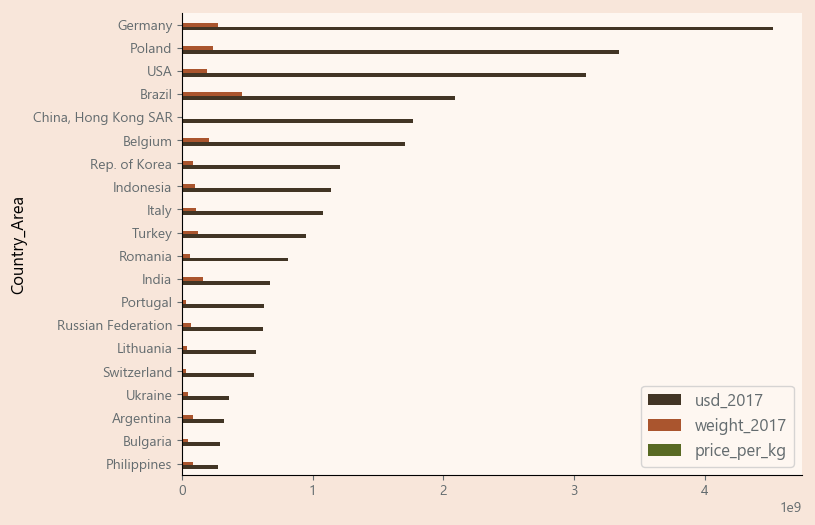

In [106]:
fig, ax = plt.subplots(figsize=(8,6))

usd_w_17.plot(kind='barh',x='Country_Area',ax=ax)

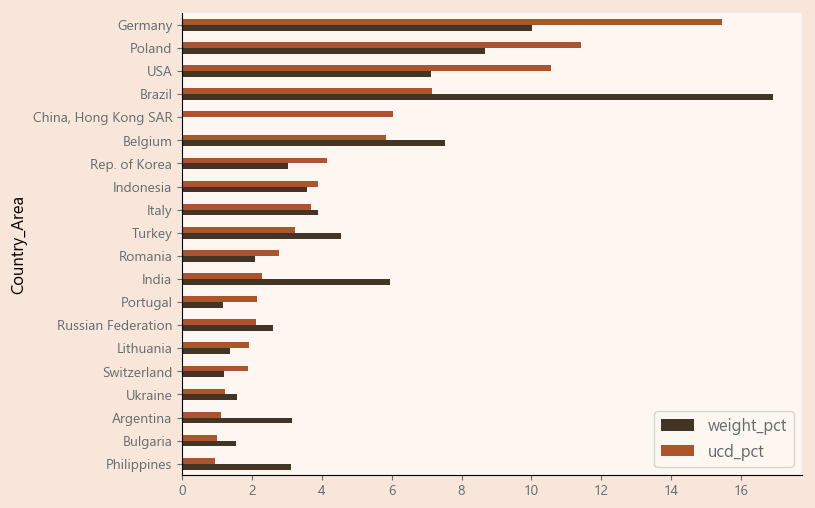

In [107]:
fig, ax = plt.subplots(figsize=(8,6))

usdw_pct_17.plot(kind='barh', x='Country_Area', ax=ax)

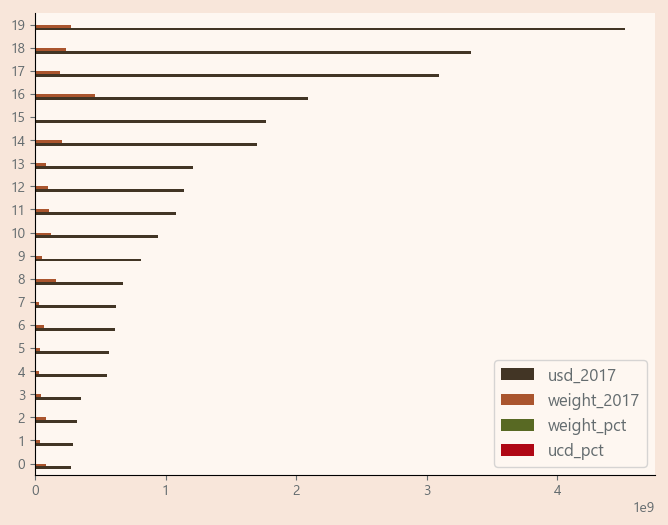

In [108]:
fig, ax = plt.subplots(figsize=(8, 6))

merge.plot(kind='barh', ax=ax)

In [109]:
germany = export_df[export_df['Country_Area']=='Germany']
germany.head()

,Country_Area,Year,Commodity,Flow,USD,Weight,Flow2
16909,Germany,2017,"Tobacco, unmanufactured, not stemmed or stripped",Export,47142234.01,6208430.00,domestic
16911,Germany,2017,"Tobacco, unmanufactured, stemmed or stripped",Export,421106890.83,59851021.00,domestic
16913,Germany,2017,Tobacco refuse,Export,6639470.15,7110330.00,domestic
16915,Germany,2017,"Cigars, cheroots and cigarillos, containing tobacco",Export,207915273.48,4553525.00,domestic
16917,Germany,2017,Cigarettes containing tobacco,Export,3077966523.63,130394474.00,domestic


In [110]:
german_usd = germany.groupby('Year').USD.sum().reset_index(name='german_usd')
german_usd.head()

,Year,german_usd
0,1991,1248924008.00
1,1992,1450401968.00
2,1993,1240888008.00
3,1994,1420087040.00
4,1995,1450777032.00


In [111]:
german_weight = germany.groupby('Year').Weight.sum().reset_index(name='german_weight')
german_weight.head()

,Year,german_weight
0,1991,118757463.00
1,1992,116123440.00
2,1993,106608802.00
3,1994,128239999.00
4,1995,123111198.00


In [112]:
poland = export_df[export_df['Country_Area']=='Poland']
poland_usd = poland.groupby('Year').USD.sum().reset_index(name='poland_usd')
poland_usd.head()

,Year,poland_usd
0,1994,53496000.00
1,1995,26932001.00
2,1996,43555000.00
3,1997,47625674.00
4,1998,44607000.00


In [113]:
poland_weight = poland.groupby('Year').Weight.sum().reset_index(name='poland_weight')
poland_weight.head()

,Year,poland_weight
0,1994,6016000.00
1,1995,4982794.00
2,1996,10669728.00
3,1997,13164254.00
4,1998,13287925.00


In [114]:
usa = export_df[export_df['Country_Area']=='USA']
usa_usd = usa.groupby('Year').USD.sum().reset_index(name='usa_usd')
usa_usd.head()

,Year,usa_usd
0,1991,6044897602.00
1,1992,6194879623.00
2,1993,5607950732.00
3,1994,6811425912.00
4,1995,6714925325.00


In [115]:
usa_weight = usa.groupby('Year').USD.sum().reset_index(name='usa_weight')
usa_weight.head()

,Year,usa_weight
0,1991,6044897602.00
1,1992,6194879623.00
2,1993,5607950732.00
3,1994,6811425912.00
4,1995,6714925325.00


In [116]:
brazil = export_df[export_df['Country_Area']=='Brazil']
#brazil
brazil_usd = brazil.groupby('Year').USD.sum().reset_index(name='brazil_usd')
brazil_usd.head()

,Year,brazil_usd
0,1989,569332393.00
1,1990,623606550.00
2,1991,818362389.00
3,1992,981599825.00
4,1993,900781598.00


In [117]:
china = export_df[export_df.Country_Area.str.contains("China", case=False, na=False)]
#china.head()
china_usd = china.groupby('Year').USD.sum().reset_index(name='china_usd')
china_usd.head()

,Year,china_usd
0,1991,372906.00
1,1992,442388074.00
2,1993,3346462319.00
3,1994,3580929018.00
4,1995,3645056020.00


In [118]:
#china.Year.value_counts()

In [119]:
hist_usd = pd.merge(pd.merge(german_usd,poland_usd,on='Year'),usa_usd,on='Year')
hist_usd.head()

,Year,german_usd,poland_usd,usa_usd
0,1994,1420087040.00,53496000.00,6811425912.00
1,1995,1450777032.00,26932001.00,6714925325.00
2,1996,1681098798.00,43555000.00,6698720493.00
3,1997,1449310073.00,47625674.00,6665179625.00
4,1998,1643165032.00,44607000.00,6333127932.00


In [120]:
hist_usd = pd.merge(pd.merge(hist_usd,brazil_usd,on='Year'),china_usd,on='Year')
hist_usd.head()

,Year,german_usd,poland_usd,usa_usd,brazil_usd,china_usd
0,1994,1420087040.00,53496000.00,6811425912.00,1030707464.00,3580929018.00
1,1995,1450777032.00,26932001.00,6714925325.00,1174961005.00,3645056020.00
2,1996,1681098798.00,43555000.00,6698720493.00,1515392407.00,4022830973.00
3,1997,1449310073.00,47625674.00,6665179625.00,1664806192.00,2567161094.00
4,1998,1643165032.00,44607000.00,6333127932.00,1558864024.00,2121962656.00


In [121]:
hist_w = pd.merge(pd.merge(german_weight,poland_weight,on='Year'),usa_weight,on='Year')
hist_w.head()

,Year,german_weight,poland_weight,usa_weight
0,1994,128239999.00,6016000.00,6811425912.00
1,1995,123111198.00,4982794.00,6714925325.00
2,1996,145286001.00,10669728.00,6698720493.00
3,1997,141665425.00,13164254.00,6665179625.00
4,1998,152201196.00,13287925.00,6333127932.00


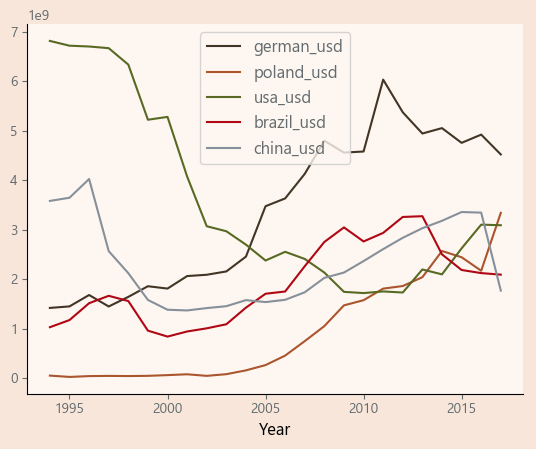

In [122]:
hist_usd.plot(kind='line',x='Year')

In [123]:
colors = ['#423525','#586923','#AF0714','#AA552E','#86909A','#B08F70']

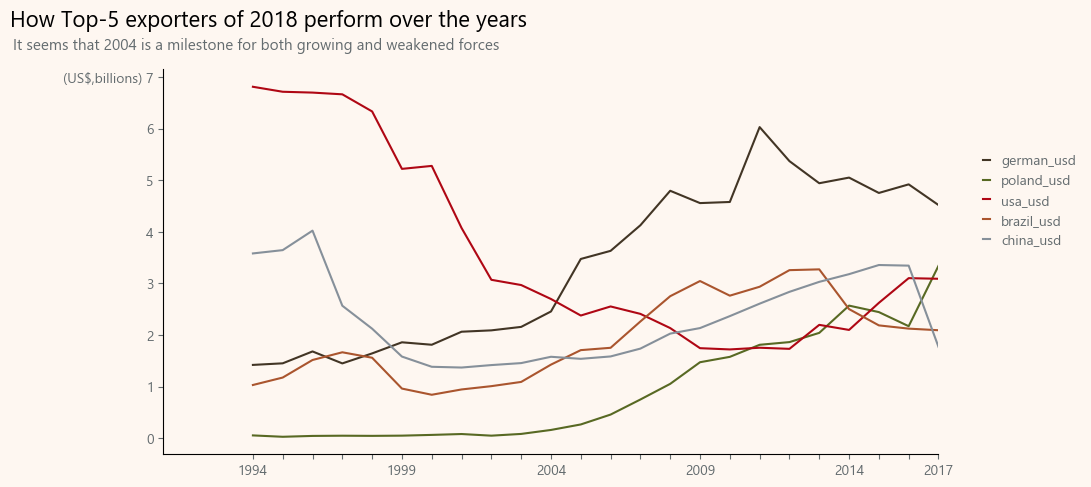

In [128]:
from matplotlib.ticker import FuncFormatter


def words(value, pos):
    billions = int(value / 1000000000)
    if billions == 7:
        return "(US$,billions) {}".format(billions)
    else: 
        return "{}".format(billions)

# # STEP TWO: Use FuncFormatter with that function???
formatter = FuncFormatter(words)

ax = hist_usd.plot(kind='line', x='Year', figsize=(10, 5), color=colors)

# STEP THREE: Give the axis your formatter
ax.yaxis.set_major_formatter(formatter)

#ax = hist_usd.plot(kind='line', x='Year', figsize=(10, 5), color=colors)

plt.rcdefaults()
plt.rcParams.update({
    #'axes.prop_cycle': cycler('color', ['#423525','#AA552E','#586923','#AF0714','#86909A','#B08F70']),
    'axes.facecolor': '#FEF7F1',
    'savefig.facecolor': '#FEF7F1',
    'figure.facecolor': '#FEF7F1',
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
#    'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': False,
    'xtick.bottom': True,
    'xtick.color': '#646C6F',
    'ytick.color':'#646C6F',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
     'legend.frameon': False,
     'legend.fontsize': 'small',
     'legend.handlelength': 0.5,
     'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Segoe UI Symbol',
    'font.size':12,
    'text.color':'#646C6F'
     })


ax.set_xlabel('Visas by continent',fontsize=12,fontname="Segoe UI Symbol")
ax.set_ylabel("It's more than 15 years that South America has been coming first",fontsize=12,fontname="Segoe UI Symbol")
ax.axes.labelpad: 4.0
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.set_xlim(1991,2017)
# ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(True)
# ax.spines['bottom'].set_visible(True)
# ax.spines['right'].set_visible(False)
# ax.set_yticks([0,10,20,30,40,50,60])
# ax.set_yticklabels(['0','','20','','40','','60'],color='#646C6F')
ax.set_xticks([1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017])
ax.set_xticklabels(['1994','','','','','1999','','','','','2004','','','','','2009','','','','','2014','','','2017'],color='#646C6F')

ax.legend(loc='lower right',
          bbox_to_anchor=(1.05, 0.5),
          bbox_transform=plt.gcf().transFigure)

title_string = "How Top-5 exporters of 2018 perform over the years"
subtitle_string = "It seems that 2004 is a milestone for both growing and weakened forces"
plt.suptitle(title_string, y=1, x=0.23, fontsize=16,color='black')
plt.title(subtitle_string, y=1.03, x=0.12, fontsize=11)

plt.savefig("top-5-exporters-overtime.pdf")
plt.show()


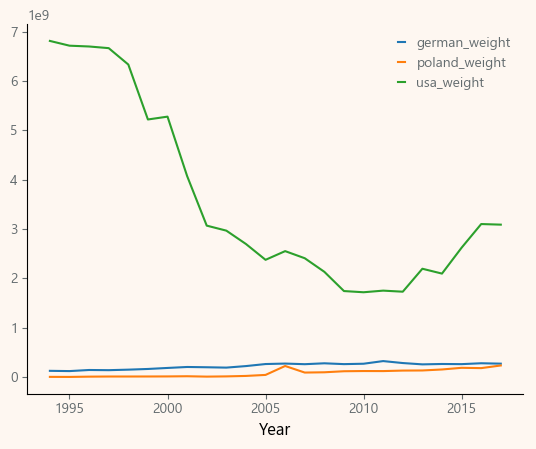

In [129]:
hist_w.plot(kind='line',x='Year')

In [132]:
#df

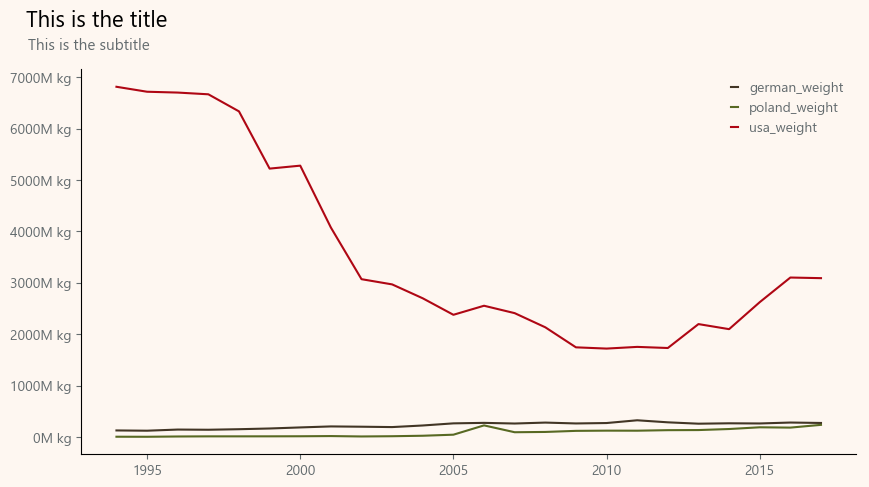

In [133]:
# STEP ONE: Build a function
# it should take value and pos
def with_words(value, pos):
    millions = int(value / 1000000)
    return "{}M kg".format(millions)

# STEP TWO: Use FuncFormatter with that function???
formatter = FuncFormatter(with_words)

# ax = hist_w.plot(kind='line', x='Year', figsize=(10, 5), color=colors)

# # STEP THREE: Give the axis your formatter
# ax.yaxis.set_major_formatter(formatter)


ax = hist_w.plot(kind='line', x='Year', figsize=(10, 5), color=colors)
ax.yaxis.set_major_formatter(formatter)

plt.rcdefaults()
plt.rcParams.update({
#    'axes.prop_cycle': cycler('color', ['#423525','#AA552E','#586923','#AF0714','#86909A','#B08F70']),
    'axes.facecolor': '#FEF7F1',
    'savefig.facecolor': '#FEF7F1',
    'figure.facecolor': '#FEF7F1',
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
#    'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': False,
    'xtick.bottom': True,
    'xtick.color': '#646C6F',
    'ytick.color':'#646C6F',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
     'legend.frameon': False,
     'legend.fontsize': 'small',
     'legend.handlelength': 0.5,
     'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Segoe UI Symbol',
    'font.size':12,
    'text.color':'#646C6F'
     })


ax.set_xlabel('Visas by continent',fontsize=12,fontname="Segoe UI Symbol")
ax.set_ylabel("It's more than 15 years that South America has been coming first",fontsize=12,fontname="Segoe UI Symbol")
ax.axes.labelpad: 4.0
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(True)
# ax.spines['bottom'].set_visible(True)
# ax.spines['right'].set_visible(False)
# ax.set_yticks([0,10,20,30,40,50,60])
# ax.set_yticklabels(['0','','20','','40','','60'],color='#646C6F')
# ax.set_xticks([1990,1991,1992,1993,1994,1995,2000,2005,2010,2015,2020])
# ax.set_yticklabels(['','1995','','2005','','2015',''],color='#646C6F')

title_string = "This is the title"
subtitle_string = "This is the subtitle"
plt.suptitle(title_string, y=1, x=0.14, fontsize=16,color='black')
plt.title(subtitle_string, y=1.03, x=0.01, fontsize=11)

plt.show()
